In [6]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [7]:
#Set Psudeorandom Seed
seed = 42

In [8]:
#Uploading the first dataset
file = 'C:/Users/Brandon/Documents/thesis/data/2a_offset.xlsx'
df = pd.read_excel (file,index_col=0,na_values=['..'])
print('file uploaded')

file uploaded


In [9]:
df.shape

(6002, 45)

In [10]:
#Create testing and training sets
array = df.values

#Create X array
X= array[:,4:45]

# Standardizing the features
X = StandardScaler().fit_transform(X)

#Create Y array
Y= array[:,3]
Y=Y.astype('int')

#Training/Test Split
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2,random_state=1 )
print('Train/Test Split Complete')

Train/Test Split Complete


In [11]:
#Impliment SMOTE
sm = SMOTE(random_state = 2) 
X_train_smote, Y_train_smote = sm.fit_sample(X_train, Y_train)

print('oversampling complete')

oversampling complete


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [12]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_smote, Y_train_smote)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.8726061615320566
[[799  93]
 [ 60 249]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       892
           1       0.73      0.81      0.76       309

    accuracy                           0.87      1201
   macro avg       0.83      0.85      0.84      1201
weighted avg       0.88      0.87      0.87      1201



In [13]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8784346378018318
[[832  60]
 [ 86 223]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       892
           1       0.79      0.72      0.75       309

    accuracy                           0.88      1201
   macro avg       0.85      0.83      0.84      1201
weighted avg       0.88      0.88      0.88      1201



In [14]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8984179850124896
[[846  46]
 [ 76 233]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       892
           1       0.84      0.75      0.79       309

    accuracy                           0.90      1201
   macro avg       0.88      0.85      0.86      1201
weighted avg       0.90      0.90      0.90      1201



In [15]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8867610324729392
[[835  57]
 [ 79 230]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       892
           1       0.80      0.74      0.77       309

    accuracy                           0.89      1201
   macro avg       0.86      0.84      0.85      1201
weighted avg       0.88      0.89      0.89      1201



In [16]:
# Make predictions on validation dataset
model = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8867610324729392
[[869  23]
 [113 196]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       892
           1       0.89      0.63      0.74       309

    accuracy                           0.89      1201
   macro avg       0.89      0.80      0.83      1201
weighted avg       0.89      0.89      0.88      1201



In [17]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8975853455453788
[[839  53]
 [ 70 239]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       892
           1       0.82      0.77      0.80       309

    accuracy                           0.90      1201
   macro avg       0.87      0.86      0.86      1201
weighted avg       0.90      0.90      0.90      1201



In [18]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8384679433805162
[[747 145]
 [ 49 260]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       892
           1       0.64      0.84      0.73       309

    accuracy                           0.84      1201
   macro avg       0.79      0.84      0.81      1201
weighted avg       0.86      0.84      0.84      1201



In [19]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8992506244796004
[[849  43]
 [ 78 231]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       892
           1       0.84      0.75      0.79       309

    accuracy                           0.90      1201
   macro avg       0.88      0.85      0.86      1201
weighted avg       0.90      0.90      0.90      1201



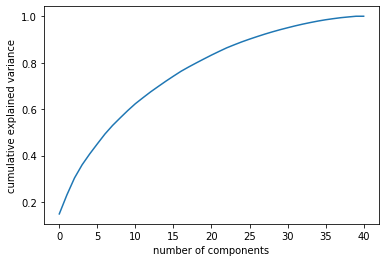

In [20]:
pca = PCA().fit(X_train_smote)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [21]:
pca = PCA(.8)
principalComponents = pca.fit_transform(X_train_smote)

In [22]:
pca.n_components_

20

In [23]:
pca.explained_variance_ratio_

array([0.14884113, 0.08183712, 0.07295536, 0.05675444, 0.046908  ,
       0.04324534, 0.04231721, 0.03684543, 0.03257296, 0.03164743,
       0.02958936, 0.0257106 , 0.02510292, 0.02315784, 0.02277709,
       0.02171484, 0.02109932, 0.01844193, 0.01748648, 0.01704   ])

In [24]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14884113, 0.23067825, 0.30363361, 0.36038805, 0.40729605,
       0.4505414 , 0.49285861, 0.52970404, 0.562277  , 0.59392443,
       0.62351379, 0.64922439, 0.67432731, 0.69748515, 0.72026224,
       0.74197708, 0.7630764 , 0.78151833, 0.79900481, 0.81604481])

In [25]:
X_train_pca = pca.transform(X_train_smote)
X_validation_pca = pca.transform(X_validation)

In [26]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.86511240632806
[[790 102]
 [ 60 249]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       892
           1       0.71      0.81      0.75       309

    accuracy                           0.87      1201
   macro avg       0.82      0.85      0.83      1201
weighted avg       0.87      0.87      0.87      1201



In [27]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8684429641965029
[[799  93]
 [ 65 244]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       892
           1       0.72      0.79      0.76       309

    accuracy                           0.87      1201
   macro avg       0.82      0.84      0.83      1201
weighted avg       0.87      0.87      0.87      1201



In [28]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8884263114071607
[[807  85]
 [ 49 260]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       892
           1       0.75      0.84      0.80       309

    accuracy                           0.89      1201
   macro avg       0.85      0.87      0.86      1201
weighted avg       0.89      0.89      0.89      1201



In [29]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8526228143213989
[[800  92]
 [ 85 224]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       892
           1       0.71      0.72      0.72       309

    accuracy                           0.85      1201
   macro avg       0.81      0.81      0.81      1201
weighted avg       0.85      0.85      0.85      1201



In [30]:
# Make predictions on validation dataset
model = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7993338884263114
[[691 201]
 [ 40 269]]
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       892
           1       0.57      0.87      0.69       309

    accuracy                           0.80      1201
   macro avg       0.76      0.82      0.77      1201
weighted avg       0.85      0.80      0.81      1201



In [31]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8001665278934221
[[699 193]
 [ 47 262]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       892
           1       0.58      0.85      0.69       309

    accuracy                           0.80      1201
   macro avg       0.76      0.82      0.77      1201
weighted avg       0.84      0.80      0.81      1201



In [32]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8368026644462948
[[771 121]
 [ 75 234]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       892
           1       0.66      0.76      0.70       309

    accuracy                           0.84      1201
   macro avg       0.79      0.81      0.80      1201
weighted avg       0.85      0.84      0.84      1201



In [33]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8884263114071607
[[810  82]
 [ 52 257]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       892
           1       0.76      0.83      0.79       309

    accuracy                           0.89      1201
   macro avg       0.85      0.87      0.86      1201
weighted avg       0.89      0.89      0.89      1201

